# Loading Pre-Trained Models


## Description

 we are using the pre-trained `squeezenet` model from the [ModelZoo](https://github.com/caffe2/caffe2/wiki/Model-Zoo) to classify our own images. As input, we will provide the path (or 
For our purposes, we will use the `models.download` module to download `squeezenet` into the `/caffe2/python/models` folder of our local Caffe2 installation with the following command:

```
python -m caffe2.python.models.download -i squeezenet
```

In [70]:
from __future__ import division
%matplotlib inline
from caffe2.proto import caffe2_pb2
import numpy as np
import skimage.io
import skimage.transform
from matplotlib import pyplot
import os
from caffe2.python import core, workspace, models
import urllib
import operator
import warnings
warnings.filterwarnings('ignore')

### Inputs

Here, we will specify the inputs to be used for this run, including the input image, the model location, the mean file (optional), the required size of the image, and the location of the label mapping file.

This command will download and save the model in your python directory.  Notice the **"-i" parameter** that tells  that you havewe are installing the model in the python directory or you can skip "-i" parameter to download it your current directory.

In [2]:
!python -m caffe2.python.models.download -i squeezenet 

Writing to /Users/mohammedayaz/anaconda3/lib/python3.6/site-packages/caffe2/python/models/squeezenet/predict_net.pb
[                                                                      ] 0%[######################################################################] 100%
Writing to /Users/mohammedayaz/anaconda3/lib/python3.6/site-packages/caffe2/python/models/squeezenet/init_net.pb


[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 1%[                                                                      ] 1%[                                                                      ] 1%[                                                                      ] 1%[                                                                      ] 1%[                        

[############################                                          ] 41%[############################                                          ] 41%[############################                                          ] 41%[############################                                          ] 41%[#############################                                         ] 42%[#############################                                         ] 42%[#############################                                         ] 42%[#############################                                         ] 42%[#############################                                         ] 42%[#############################                                         ] 42%[#############################                                         ] 42%[#############################                                         ] 42%[##############################                                        ] 43%[###########

[######################################                                ] 55%[######################################                                ] 55%[######################################                                ] 55%[######################################                                ] 55%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 56%[#######################################                               ] 57%[###########

[################################################                      ] 69%[################################################                      ] 69%[################################################                      ] 69%[################################################                      ] 69%[################################################                      ] 69%[################################################                      ] 69%[################################################                      ] 69%[################################################                      ] 69%[#################################################                     ] 70%[#################################################                     ] 70%[#################################################                     ] 70%[#################################################                     ] 70%[#################################################                     ] 70%[###########

[##########################################################            ] 83%[##########################################################            ] 83%[##########################################################            ] 83%[##########################################################            ] 83%[##########################################################            ] 83%[##########################################################            ] 84%[##########################################################            ] 84%[##########################################################            ] 84%[##########################################################            ] 84%[##########################################################            ] 84%[##########################################################            ] 84%[##########################################################            ] 84%[##########################################################            ] 84%[###########

[###################################################################   ] 97%[###################################################################   ] 97%[###################################################################   ] 97%[###################################################################   ] 97%[####################################################################  ] 98%[####################################################################  ] 98%[####################################################################  ] 98%[####################################################################  ] 98%[####################################################################  ] 98%[####################################################################  ] 98%[####################################################################  ] 98%[##################################################################### ] 99%[##################################################################### ] 99%[###########

The path contains both files of the pretrained models i.e.  init_net.pb and predict_net.pb 

In [71]:
CAFFE_MODELS = "/Users/mohammedayaz/anaconda3/lib/python3.6/site-packages/caffe2/python/models"

The image is from Wikipedia (Creative Commons) and it is an image of an Orange. 

In [72]:
IMAGE_LOCATION = "https://upload.wikimedia.org/wikipedia/commons/7/7b/Orange-Whole-%26-Split.jpg"

Format below is the model's: **<'folder, INIT_NET, predict_net, mean, input image size>'**


You can switch 'squeezenet' out with 'bvlc_alexnet', 'bvlc_googlenet' or others that you have downloaded. Here, will go with squeezenet. We are creating a tuple for the model containing the details like the meanfile, name of the model and so on. 

In [73]:
MODEL = 'squeezenet', 'init_net.pb', 'predict_net.pb', 'ilsvrc_2012_mean.npy', 227
print(MODEL)
type(MODEL)

('squeezenet', 'init_net.pb', 'predict_net.pb', 'ilsvrc_2012_mean.npy', 227)


tuple

codes - these help decypher the output and source from a list from ImageNet's object codes to provide an result like "lemon" depending on what's in the picture that you submit to the CNN.

In [74]:
codes =  "https://gist.githubusercontent.com/aaronmarkham/cd3a6b6ac071eca6f7b4a6e40e6038aa/raw/9edb4038a37da6b5a44c3b5bc52e448ff09bfe5b/alexnet_codes"

### Setup paths

With the configs set, we can now load the mean file (if it exists), as well as the predict net and the init net.

In [75]:
CAFFE_MODELS = os.path.expanduser(CAFFE_MODELS)
print(CAFFE_MODELS)

/Users/mohammedayaz/anaconda3/lib/python3.6/site-packages/caffe2/python/models


Mean can be 128 or custom based on the model. It gives better results to remove the colors found in all of the training images. Here we are using a mean file. 

Make sure you **download the mean file** from this link - https://github.com/BVLC/caffe/blob/master/python/caffe/imagenet/ilsvrc_2012_mean.npy?raw=true

In [76]:
MEAN_FILE = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[3])
print(MEAN_FILE)

/Users/mohammedayaz/anaconda3/lib/python3.6/site-packages/caffe2/python/models/squeezenet/ilsvrc_2012_mean.npy


In [77]:
print(np.load(MEAN_FILE))

[[[110.17708588 110.45915222 110.68373108 ... 110.9342804  110.79355621
   110.5134201 ]
  [110.42878723 110.98564148 111.27901459 ... 111.55055237 111.30683136
   110.6951828 ]
  [110.525177   111.19493103 111.54753113 ... 111.81067657 111.47111511
   110.76550293]
  ...
  [ 98.6385498   99.15545654  99.39542389 ...  99.43512726  99.22799683
    98.70215607]
  [ 98.55238342  98.93383789  99.12541962 ...  99.1762619   99.03337097
    98.60868835]
  [ 98.3693161   98.45822906  98.6139679  ...  98.66000366  98.58787537
    98.44535828]]

 [[117.64383698 118.0049057  118.22001648 ... 118.46447754 118.22627258
   117.91434479]
  [117.93730164 118.60555267 118.90380859 ... 119.14463043 118.81645203
   118.16949463]
  [118.08901978 118.87294006 119.24718475 ... 119.45949554 119.02463531
   118.27294922]
  ...
  [110.36632538 111.02960968 111.31279755 ... 111.16692352 110.83407593
   110.2490921 ]
  [110.24700928 110.75028992 110.95999908 ... 110.8342514  110.59172821
   110.12150574]
  [109.

Load the mean file and calculate.

Here, we are calculating the mean of the each dimension.

In [78]:
if not os.path.exists(MEAN_FILE):
    print("No mean file found! You can download the file or just go with your mean as 128")
    mean = 128
else:
    print ("Mean file found!")
    mean = np.load(MEAN_FILE).mean(1).mean(1)
    print(mean.shape)
    print(mean)

Mean file found!
(3,)
[104.00698793 116.66876762 122.67891434]


Let's add some more dimensions for the model. 

In [79]:
mean = mean[:, np.newaxis, np.newaxis]
print(mean.shape)
print(mean)

(3, 1, 1)
[[[104.00698793]]

 [[116.66876762]]

 [[122.67891434]]]


In [80]:
print("mean was set to: ", mean)

mean was set to:  [[[104.00698793]]

 [[116.66876762]]

 [[122.67891434]]]


Let's set the image size. It is important to use the same size that was used to train the model.

In [81]:
INPUT_IMAGE_SIZE = MODEL[4]
print(INPUT_IMAGE_SIZE)

227


 make sure all of the files are around.

In [82]:
INIT_NET = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[1])
PREDICT_NET = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[2])

Check to see if the files exist

In [83]:
if not os.path.exists(INIT_NET):
    print("WARNING: " + INIT_NET + " not found!")
else:
    if not os.path.exists(PREDICT_NET):
        print("WARNING: " + PREDICT_NET + " not found!")
    else:
        print("All needed files found!")        

All needed files found!


### Image Preprocessing

In this section, we are working on processing the image to our desired format required by the model like resizing,cropping, converting the image to RGB to BGR and many other things. Basically we are creating a image processing pipeline. 

Function to **crop** the image. It will trim out the sides and keep the middle part of the image according to values of cropx and cropy

In [84]:
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    print("image_shape", img.shape)
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

**Rescale** function resizes the image by maintaining the aspect ratios of the image. It also checks the image if it is portrait or landscape image then, according it it resizes it. This function is used with center crop to resize the image and get the center crop as required by our model.

- aspect is greater than 1 then it is landscape image. - We need to resize height  
- Aspect is less than 1 then it is portrait image. we need to resize width

In [85]:
def rescale(img, input_height, input_width):
    # Get original aspect ratio
    aspect = img.shape[1]/float(img.shape[0])
    print("Aspect ratio:",aspect)
    if(aspect>1):
        # landscape orientation - wide image
        res = int(aspect * input_height)
        imgScaled = skimage.transform.resize(img, (input_width, res))
    if(aspect<1):
        # portrait orientation - tall image
        res = int(input_width/aspect)
        imgScaled = skimage.transform.resize(img, (res, input_height))
    if(aspect == 1):
        imgScaled = skimage.transform.resize(img, (input_width, input_height))
    return imgScaled

 Load the image as a 32-bit float. skimage.io.imread returns a HWC ( Height, Width and Channel) ordered RGB image


In [86]:
img = skimage.img_as_float(skimage.io.imread(IMAGE_LOCATION)).astype(np.float32)
print("Original Image Shape: " , img.shape)

Original Image Shape:  (1920, 3680, 3)


Rescale the image to comply with our desired input size. This will not make the image 227x227, but it will make either the height or width 227 so we can get the ideal center crop.

Aspect ratio: 1.9166666666666667
Image Shape after rescaling:  (227, 435, 3)


Text(0.5,1,'Rescaled image')

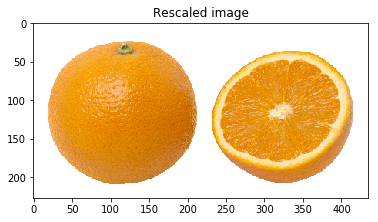

In [87]:
img = rescale(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print("Image Shape after rescaling: " , img.shape)
pyplot.figure()
pyplot.imshow(img)
pyplot.title('Rescaled image')

Crop the center 227x227 pixels of the image so we can feed it to our model

image_shape (227, 435, 3)
Image Shape after cropping:  (227, 227, 3)


Text(0.5,1,'Center Cropped')

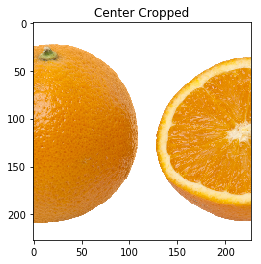

In [88]:
img = crop_center(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print("Image Shape after cropping: " , img.shape)
pyplot.figure()
pyplot.imshow(img)
pyplot.title('Center Cropped')

caffe2 expects a format i.e. CHW (Channel, Height and Width). Let's switch from HWC to CHW 

In [89]:
print("HWC Image Shape:" , img.shape)
img = img.swapaxes(1, 2).swapaxes(0, 1)
print("CHW Image Shape: " , img.shape)

HWC Image Shape: (227, 227, 3)
CHW Image Shape:  (3, 227, 227)


Print the images. 

(3, 227, 227)
(227, 227)


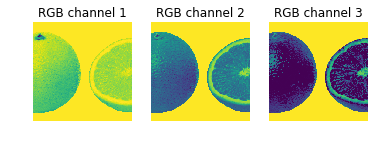

In [90]:
pyplot.figure()
for i in range(3):
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(img[i])
    pyplot.axis('off')
    pyplot.title('RGB channel %d' % (i+1))
print(img.shape)
print(img[1].shape)

Switch RGB format to BGR,which caffe2 supports. Basically, we are rearranging the rows  as third, second and first. 

In [91]:
print("RGB format of the image")
img = img[(2, 1, 0), :, :]
print("\nBGR - format of the image")
print(img)

RGB format of the image

BGR - format of the image
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


(3, 227, 227)
(3, 227, 227)
(227, 227)


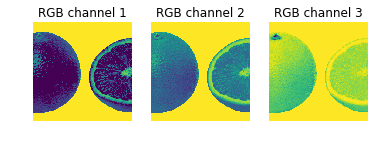

In [92]:
print(img.shape)
pyplot.figure()
for i in range(3):
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(img[i])
    pyplot.axis('off')
    pyplot.title('RGB channel %d' % (i+1))
print(img.shape)
print(img[1].shape)

In [93]:
print(img.shape)
print(img)

(3, 227, 227)
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


Removing the mean of the images for better accuracy. i.e. normalizing the image.

In [94]:
img = img * 255 - mean

In [95]:
print(img)
print(img.shape)

[[[150.99301207 150.99301207 150.99301207 ... 150.99301207 150.99301207
   150.99301207]
  [150.99301207 150.99301207 150.99301207 ... 150.99301207 150.99301207
   150.99301207]
  [150.99301207 150.99301207 150.99301207 ... 150.99301207 150.99301207
   150.99301207]
  ...
  [150.99301207 150.99301207 150.99301207 ... 150.99301207 150.99301207
   150.99301207]
  [150.99301207 150.99301207 150.99301207 ... 150.99301207 150.99301207
   150.99301207]
  [150.99301207 150.99301207 150.99301207 ... 150.99301207 150.99301207
   150.99301207]]

 [[138.33123238 138.33123238 138.33123238 ... 138.33123238 138.33123238
   138.33123238]
  [138.33123238 138.33123238 138.33123238 ... 138.33123238 138.33123238
   138.33123238]
  [138.33123238 138.33123238 138.33123238 ... 138.33123238 138.33123238
   138.33123238]
  ...
  [138.33123238 138.33123238 138.33123238 ... 138.33123238 138.33123238
   138.33123238]
  [138.33123238 138.33123238 138.33123238 ... 138.33123238 138.33123238
   138.33123238]
  [138.

add batch size axis which completes the formation of the NCHW shaped input that we want

In [96]:
img = img[np.newaxis, :, :, :].astype(np.float32)

In [97]:
print("NCHW image (ready to be used as input):\n", img.shape)

NCHW image (ready to be used as input):
 (1, 3, 227, 227)


### Prepare the CNN and run the net!

Now that the image is ready to be ingested by the CNN, let's open the protobufs, load them into the workspace, and run the net. 

In [98]:
with open(INIT_NET, "rb") as f:
    init_net = f.read()
with open(PREDICT_NET, "rb") as f:
    predict_net = f.read()

Initialize the predictor from the input protobufs

In [99]:
p = workspace.Predictor(init_net, predict_net)

Run the net by passing the image as the input.

In [100]:
results = p.run({'data': img})

Convert the array into numpy array to explore it. 

In [101]:
results = np.asarray(results)
print("results shape: ", results.shape)

results shape:  (1, 1, 1000, 1, 1)


We will take the prediction results from the array. Here, we will remove the unwanted 1 dimensional arrays for the result array

In [102]:
preds = np.squeeze(results)

let's get the index and value of the element that has the maximum value - i.e. our predicted result 

Find the prediction and the confidence by finding the maximum value and index of maximum value in preds array

In [109]:
current_prediction_score, current_confidence_score = max(enumerate(preds), key=operator.itemgetter(1))

Print our results 

In [110]:
print("Prediction: ", current_prediction_score)
print("Confidence: ", current_confidence_score)

Prediction:  950
Confidence:  0.9537523


### Process Results

Recall ImageNet is a 1000 class dataset and observe that it is no coincidence that the third axis of results is length 1000. This axis is holding the probability for each category in the pre-trained model. So when you look at the results array at a specific index, the number can be interpreted as the probability that the input belongs to the class corresponding to that index. Now that we have run the predictor and collected the results, we can interpret them by matching them to their corresponding english labels.


the rest of this is digging through the results 

In [35]:
from pprint import pprint
from urllib.request import urlopen

Deleting some axis that are not required. 

In [112]:
print(results.shape)
results = np.delete(results, 1)
print("After deleting the axis 1")
print(results.shape)

(999,)
After deleting the axis 1
(998,)


Let's create an array with the prediction scores and indexes. These indexes will be matched to indexes of the english labels.  

In [113]:
index = 0
highest = 0
arr = np.empty((0,2), dtype=object)
arr[:,0] = int(10)
arr[:,1:] = float(10)
for i, r in enumerate(results):
    i=i+1
    arr = np.append(arr, np.array([[i,r]]), axis=0)
    if (r > highest):
        highest = r 
        index = i 
print(arr)

[[1.0 2.9886620522140417e-12]
 [2.0 3.009785210774871e-14]
 [3.0 7.939216097692034e-14]
 ...
 [996.0 1.3301078638505714e-07]
 [997.0 5.351142862153324e-10]
 [998.0 8.26304909912201e-12]]


Sort them in the Descending order and Take the top 5 results 

In [115]:
N=5
topN = sorted(arr, key=lambda x: x[1], reverse=True)[:5]

pprint("\nRaw top {} results: {}".format(N,topN))

('\n'
 'Raw top 5 results: [array([949.0, 0.9537522792816162], dtype=object), '
 'array([950.0, 0.04611453041434288], dtype=object), array([939.0, '
 '7.806169014656916e-05], dtype=object), array([941.0, 1.900422830658499e-05], '
 'dtype=object), array([521.0, 1.1544380868144799e-05], dtype=object)]')


 Isolate the indexes of the top-N most likely classes.

In [38]:
topN_inds = [int(x[0]) for x in topN]
print("\n\nTop {} classes in order: {}".format(N,topN_inds))



Top 5 classes in order: [950, 951, 940, 942, 522]


Now we can grab the code list and create a class Look Up Table. Opent the link to the github gist that contains the list of names to create a lookup table.

In [39]:
response = urlopen(codes)
class_LUT = []

Create the class with labels

In [40]:
for line in response:
    code,result = line.decode().partition(":")[::2]
    code = code.strip()
    result = result.replace("'", "")
    if code.isdigit():
        class_LUT.append(result.split(",")[0][1:])


In [41]:
print(len(class_LUT))

1000


In [42]:
for i in class_LUT:
    print(i)

tench
goldfish
great white shark
tiger shark
hammerhead
electric ray
stingray
cock
hen
ostrich
brambling
goldfinch
house finch
junco
indigo bunting
robin
bulbul
jay
magpie
chickadee
water ouzel
kite
bald eagle
vulture
great grey owl
European fire salamander
common newt
eft
spotted salamander
axolotl
bullfrog
tree frog
tailed frog
loggerhead
leatherback turtle
mud turtle
terrapin
box turtle
banded gecko
common iguana
American chameleon
whiptail
agama
frilled lizard
alligator lizard
Gila monster
green lizard
African chameleon
Komodo dragon
African crocodile
American alligator
triceratops
thunder snake
ringneck snake
hognose snake
green snake
king snake
garter snake
water snake
vine snake
night snake
boa constrictor
rock python
Indian cobra
green mamba
sea snake
horned viper
diamondback
sidewinder
trilobite
harvestman
scorpion
black and gold garden spider
barn spider
garden spider
black widow
tarantula
wolf spider
tick
centipede
black grouse
ptarmigan
ruffed grouse
prairie chicken
peacock

In [43]:
for n in topN:
    print(n)

[950.0 0.9537522792816162]
[951.0 0.04611453041434288]
[940.0 7.806169014656916e-05]
[942.0 1.900422830658499e-05]
[522.0 1.1544380868144799e-05]


For each of the top-N results, associate the integer result with an actual class

In [44]:
for n in topN:
    print("Model predicts '{}' with {}% confidence".format(class_LUT[int(n[0])],float("{0:.2f}".format(n[1]*100))))

Model predicts 'orange' with 95.38% confidence
Model predicts 'lemon' with 4.61% confidence
Model predicts 'spaghetti squash' with 0.01% confidence
Model predicts 'butternut squash' with 0.0% confidence
Model predicts 'croquet ball' with 0.0% confidence


### Feeding Larger Batches

Above is an example of how to feed one image at a time. We can achieve higher throughput if we feed multiple images at a time in a single batch. Recall, the data fed into the classifier is in 'NCHW' order, so to feed multiple images, we will expand the 'N' axis.

 List of input images to be fed

In [45]:
images = ["images/cowboy-hat.jpg",
            "images/cell-tower.jpg",
            "images/Ducreux.jpg",
            "images/pretzel.jpg",
            "images/orangutan.jpg",
            "images/aircraft-carrier.jpg",
            "images/cat.jpg"]

Allocate space for the batch of formatted images. We are filling the arrays with zeroes. 

In [116]:
NCHW_batch = np.zeros((len(images),3,227,227))
print ("Batch Shape: ",NCHW_batch.shape)


Batch Shape:  (7, 3, 227, 227)


Blank arrays filled with zeroes.

In [117]:
print(NCHW_batch)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
 

 For each of the images in the list, format it and place it in the batch. We are batch processing the images here i.e. like resizing, cropping out the sides of the image, changing RGB to BGR and other things that were done earlier for a single image.

In [47]:
for i,curr_img in enumerate(images):
    img = skimage.img_as_float(skimage.io.imread(curr_img)).astype(np.float32)
    img = rescale(img, 227, 227)
    img = crop_center(img, 227, 227)
    img = img.swapaxes(1, 2).swapaxes(0, 1)
    img = img[(2, 1, 0), :, :]
    img = img * 255 - mean
    NCHW_batch[i] = img

print("NCHW image (ready to be used as input): ", NCHW_batch.shape)

Aspect ratio: 1.0712890625
image_shape (227, 243, 3)
Aspect ratio: 1.3333333333333333
image_shape (227, 302, 3)
Aspect ratio: 0.7878071833648393
image_shape (288, 227, 3)
Aspect ratio: 1.072
image_shape (227, 243, 3)
Aspect ratio: 1.5058823529411764
image_shape (227, 341, 3)
Aspect ratio: 1.4014598540145986
image_shape (227, 318, 3)
Aspect ratio: 1.3333333333333333
image_shape (227, 302, 3)
NCHW image (ready to be used as input):  (7, 3, 227, 227)


Run the net on the batch

In [48]:
results = p.run([NCHW_batch.astype(np.float32)])

Turn it into something we can play with and examine which is in a multi-dimensional array

In [49]:
results = np.asarray(results)
print(results.shape)

(1, 7, 1000, 1, 1)


Squeeze out the unnecessary axis

In [50]:
preds = np.squeeze(results)
print("Squeezed Predictions Shape, with batch size {}: {}".format(len(images),preds.shape))

Squeezed Predictions Shape, with batch size 7: (7, 1000)


Describe the results and print them.
Enumerate through the predictions and find the elements with maximum values (confidence and maximum) and print out the corresponding class. 

In [51]:
for i,pred in enumerate(preds):
    print("Results for: '{}'".format(images[i]))
    curr_pred, curr_conf = max(enumerate(pred), key=operator.itemgetter(1))
    print("\tPrediction: ", curr_pred)
    print("\tClass Name: ", class_LUT[int(curr_pred)])
    print("\tConfidence: ", curr_conf)

Results for: 'images/cowboy-hat.jpg'
	Prediction:  515
	Class Name:  cowboy hat
	Confidence:  0.8542663
Results for: 'images/cell-tower.jpg'
	Prediction:  645
	Class Name:  maypole
	Confidence:  0.24548137
Results for: 'images/Ducreux.jpg'
	Prediction:  568
	Class Name:  fur coat
	Confidence:  0.22564225
Results for: 'images/pretzel.jpg'
	Prediction:  932
	Class Name:  pretzel
	Confidence:  0.99906546
Results for: 'images/orangutan.jpg'
	Prediction:  365
	Class Name:  orangutan
	Confidence:  0.94135326
Results for: 'images/aircraft-carrier.jpg'
	Prediction:  403
	Class Name:  aircraft carrier
	Confidence:  0.9999486
Results for: 'images/cat.jpg'
	Prediction:  281
	Class Name:  tabby
	Confidence:  0.53431386
